<a href="https://colab.research.google.com/github/Prezii/Project/blob/main/Waveform_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Colaboratory notebook

In [1]:
!pip install PyDrive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
downloaded = drive.CreateFile({'id':"1eggTF4aMdUmNRACeHQIuibcckoixnvM6"})   # replace the id with id of file you want to access
downloaded.GetContentFile('tremor_events-2009-10-01T00_00_00-2017-07-31T23_59_59.csv')        # replace the file name with your file

In [5]:
import pandas as pd
import numpy as np
data = pd.read_csv('tremor_events-2009-10-01T00_00_00-2017-07-31T23_59_59.csv')

In [6]:
data.head()

,lat,lon,depth,starttime,energy,duration
0,39.910,-122.870,40.0,2015-07-14 02:27:30,0.0,None
1,42.293,-123.305,36.2,2010-02-06 21:07:30,0.0,None
2,41.020,-122.780,20.0,2011-06-03 16:22:30,0.0,None
3,44.800,-123.155,53.0,2011-06-08 11:15:00,0.0,None
4,48.415,-123.875,54.0,2011-08-25 07:00:00,0.0,None


In [7]:
start_list= data.loc[:,"starttime"]
starttime_ls= start_list.to_numpy()
print(starttime_ls)

[' 2015-07-14 02:27:30' ' 2010-02-06 21:07:30' ' 2011-06-03 16:22:30' ...
 ' 2017-07-31 22:12:30' ' 2017-07-31 22:20:00' ' 2017-07-31 22:37:30']


##Obspy

In [8]:
import sys
#Install obspy
!{sys.executable} -m pip install obspy
import obspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime

In [10]:
#Additional packages
%matplotlib inline
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install numpy
import matplotlib.pyplot as plt
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##IRIS metadata

In this part we are goint to use IRIS metadata for NLLB and PGC stations. 

Note:
To avoid problems with "location" parameter, it is used the "*" string.

###Example of plot

In [11]:
client = Client("IRIS")
network = "CN" #Canadian National Seismograph Network
station = "PGC"
location="*"
channel= "BHE"

In [12]:
starttime= UTCDateTime(2015, 7, 14, 22, 24, 57, 570000) 
endtime = starttime + 300 # 5 min = 300 sec

In [13]:
#starttime=starttime, endtime=endtime,
inv = client.get_stations(network=network, station=station, channel=channel,level="response")

print(inv)

Inventory created at 2022-08-30T13:56:23.478400Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.49
		    http://service.iris.edu/fdsnws/station/1/query?network=CN&station=P...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			CN
		Stations (1):
			CN.PGC (Sidney, BC, CA)
		Channels (6):
			CN.PGC..BHE (6x)


In [14]:
st = client.get_waveforms(network=network, station = station, location = location, channel = channel , starttime=starttime, endtime=endtime)
print(st) 

1 Trace(s) in Stream:
CN.PGC..BHE | 2015-07-14T22:24:57.575000Z - 2015-07-14T22:29:57.550000Z | 40.0 Hz, 12000 samples


##Plot

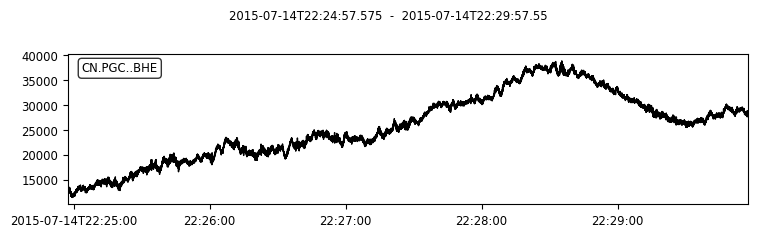

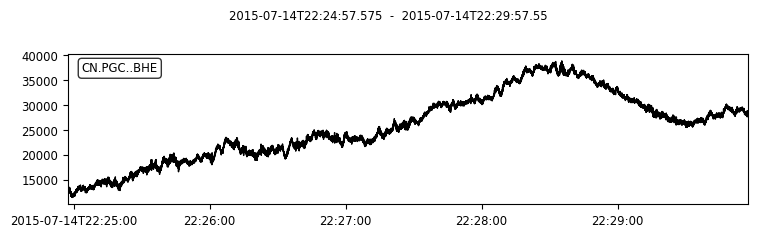

In [15]:
tr = st[0]
tr.plot()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


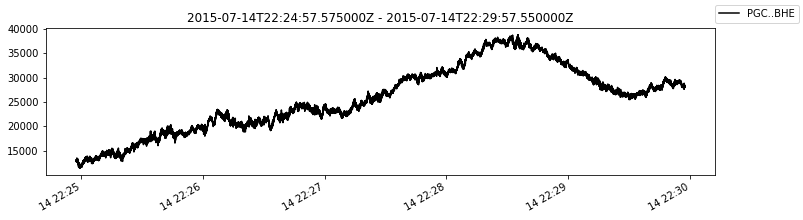

In [16]:
start_time = tr.stats.starttime
end_time = tr.stats.endtime

fig, ax = plt.subplots(figsize=(12, 3))

ax.plot(tr.times("matplotlib"), tr.data, color="0", label = f"{tr.stats.station}..{tr.stats.channel}")
ax.xaxis_date()
fig.autofmt_xdate()

fig.legend(loc="best")
plt.title(f"{start_time} - {end_time}")
plt.show()

https://docs.obspy.org/packages/autogen/obspy.clients.fdsn.client.Client.get_waveforms.html

In [17]:
#Postition '0' of array of date (year and time)
starttime_ls[0]

' 2015-07-14 02:27:30'

In [18]:
#
def fun_starttime(ls):
  date=[]
  
  """Transformation to better adaptation of starttime in the IRIS database,
  as result, it is obtenied an array of str """
  
  for i in range(len(ls)):
    if ls[i] !=" ":
      date.append(ls[i])
    elif ls[i] == " " and i !=0:
      date.append("T")
  
  #Concatenation of arr of str
  date_st = ""
  for i in range(len(date)):
    date_st += date[i]

  return date_st

In [19]:
#Transforms the date from Tremor catalog to a format to the IRIS database via Obspy
new_startime_ls = []
for i in range(len(starttime_ls)):
  new_startime_ls.append(fun_starttime(starttime_ls[i]))

In [30]:
#Transform the list to numpy array
new_startime_ls_np = np.array(new_startime_ls, dtype=str)

In [31]:
new_startime_ls_np[0]

'2015-07-14T02:27:30'

In [32]:
new_startime_ls_np

array(['2015-07-14T02:27:30', '2010-02-06T21:07:30',
       '2011-06-03T16:22:30', ..., '2017-07-31T22:12:30',
       '2017-07-31T22:20:00', '2017-07-31T22:37:30'], dtype='<U19')

###Creation of Date_dataset

In [34]:
#Convierte 
#pd.DataFrame(new_startime_ls_np).to_csv('date_dataset.csv')

###Data of interest

In [22]:
starttime= UTCDateTime(new_startime_ls_np[0])
endtime = starttime + 300 # 5 min = 300 sec

st = client.get_waveforms(network=network, station = station, location = location, channel = channel , starttime=starttime, endtime=endtime,attach_response=True)
print(st)

1 Trace(s) in Stream:
CN.PGC..BHE | 2015-07-14T02:27:30.000000Z - 2015-07-14T02:32:30.000000Z | 40.0 Hz, 12001 samples


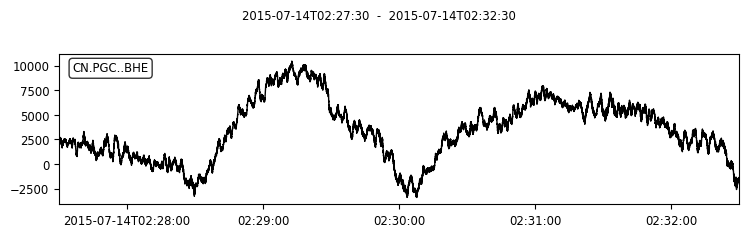

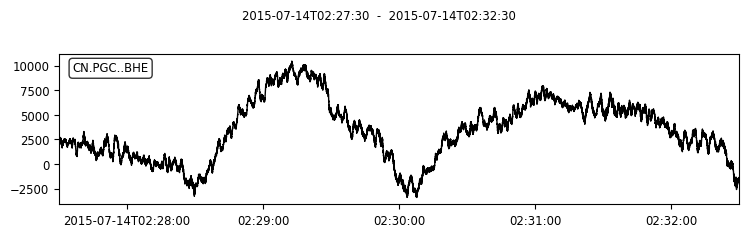

In [23]:
len(st)
tr = st[0]
st.plot()

In [24]:
tr.stats

               network: CN
               station: PGC
              location: 
               channel: BHE
             starttime: 2015-07-14T02:27:30.000000Z
               endtime: 2015-07-14T02:32:30.000000Z
         sampling_rate: 40.0
                 delta: 0.025
                  npts: 12001
                 calib: 1.0
_fdsnws_dataselect_url: http://service.iris.edu/fdsnws/dataselect/1/query
               _format: MSEED
                 mseed: AttribDict({'dataquality': 'M', 'number_of_records': 6, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 24576})
            processing: ['ObsPy 1.3.0: trim(endtime=UTCDateTime(2015, 7, 14, 2, 32, 30)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2015, 7, 14, 2, 27, 30))']
              response: Channel Response
	From m/s (velocity in meters per second) to counts (digital counts)
	Overall Sensitivity: 5.09133e+09 defined at 0.100 Hz
	6 stages:
		Stage 1: PolesZerosResponseStage from m/

##Instrulmental correction
Now we apply the instrument correction and simulation:
https://docs.obspy.org/packages/obspy.signal.html

In [25]:
#Choose a home Directory for project (everything will be saved in this directory)
#directory='/Users/jeanbaptistetary/Documents/SSI/'
#:\Users\ce.preciado\Downloads

#Name of the folder that will contain all the Near Field / Regional results.
#projectName='NearField'

In [26]:
directory='C://Users//ce.preciado//Downloads//'
#projectName='NearField'

In [27]:
import os

#ldir=os.listdir(directory)